<a href="https://colab.research.google.com/github/Keltings/Soccer/blob/main/169589_LKelida_DSA8203_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Exploratory Data Analysis on ACLED Conflict Data for Liberia

## Introduction

II'll be conducting an Exploratory Data Analysis (EDA) on the ACLED Conflict Data for Liberia. The dataset provides detailed information on various conflict events, including actors, event types, and geographic locations.
Understanding and mitigating conflicts is paramount for fostering peace and stability in regions affected by socio-political unrest. In this comprehensive analysis, we delve into a dataset documenting various conflict events across Africa, aiming to extract insights and predictive patterns to inform proactive interventions and policy decisions.

**Choice of Predictor:**

The selection of the 'event_type' attribute as the predictor variable aligns with its pivotal role in characterizing conflict events. Event types encapsulate diverse manifestations of conflicts, ranging from riots and protests to battles and violence against civilians. By leveraging event types as predictors, I  aim to discern underlying patterns, anticipate conflict trajectories, and inform conflict resolution strategies.






In [1]:
#import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import mode
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score



# Download NLTK resources (run this only once)
nltk.download('punkt')
nltk.download('stopwords')


import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


### Load Data

In [2]:
#Import dataset
df = pd.read_csv('https://query.data.world/s/aivmkfgf4x56x4nu62phbeobnb5sm5?dws=00000')

# display all the columns
pd.set_option('display.max_columns', None)

# first five rows
df.head()



,data_id,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,assoc_actor_1,inter1,actor2,assoc_actor_2,inter2,interaction,region,country,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,timestamp,iso3
0,NaN,#country+code,#event+code,NaN,#date+occurred,NaN,NaN,#event+type,#group+name+first,#group+name+first+assoc,NaN,#group+name+second,#group+name+second+assoc,NaN,NaN,#region+name,#country+name,#adm1+name,#adm2+name,#adm3+name,#loc+name,#geo+lat,#geo+lon,NaN,#meta+source,NaN,#description,#affected+killed,NaN,NaN
1,2974907.0,430,LBR1375,1375.0,2019-01-31,2019.0,1.0,Riots/Protests,Protesters (Liberia),NaN,6.0,NaN,NaN,0.0,60.0,Western Africa,Liberia,Montserrado,Greater Monrovia,Monrovia,Monrovia,6.3100,-10.8000,1.0,New Dawn (Monrovia),National,"31 January. Retirees, upset with the provision...",0,1.549310e+09,LBR
2,2974908.0,430,LBR1376,1376.0,2019-01-31,2019.0,1.0,Strategic development,Unidentified Armed Group (Liberia),NaN,3.0,Civilians (Liberia),Journalists (Liberia),7.0,37.0,Western Africa,Liberia,Montserrado,Greater Monrovia,Monrovia,Monrovia,6.3100,-10.8000,1.0,Liberian Observer,National,31 January. 3 armed men break into the Roots F...,0,1.549310e+09,LBR
3,2974906.0,430,LBR1374,1374.0,2019-01-28,2019.0,1.0,Riots/Protests,Rioters (Liberia),Students (Liberia); CDC: Coalition for Democra...,5.0,Rioters (Liberia),SUP: Students Unification Party,5.0,55.0,Western Africa,Liberia,Montserrado,Greater Monrovia,Monrovia,Monrovia,6.3100,-10.8000,1.0,FrontPageAfrica (Monrovia),National,28 January. Clashes between SUD and CDC studen...,0,1.549310e+09,LBR
4,2942525.0,430,LBR1372,1372.0,2019-01-21,2019.0,1.0,Riots/Protests,Protesters (Liberia),NaN,6.0,NaN,NaN,0.0,60.0,Western Africa,Liberia,Montserrado,Greater Monrovia,Monrovia,Monrovia,6.3100,-10.8000,1.0,GNN Liberia,National,21 January. Dozens of Orange cell subscribers ...,0,1.548699e+09,LBR


### Data Understanding:
##### a. Display Shape Size and Dtypes of the data

In [3]:
# Display duplicate rows
print("Duplicate Rows:")
# Check for duplicate rows
print(df.duplicated().sum())
print('--------------------------------------------------------------------------')
# Display the size/ number of records
data_size = df.size  # in megabytes
print(f"Size of the Data: {data_size:.2f}")
print('--------------------------------------------------------------------------')

# Display the shape of the DataFrame
data_shape = df.shape
print(f"Shape of the Data: {data_shape}")
print('--------------------------------------------------------------------------')

# Check for missing values in each column
missing_values = df.isnull().sum()

# Display columns with missing values
print("Columns with Missing Values:")
print(missing_values[missing_values > 0])
print('--------------------------------------------------------------------------')

# Display unique values and value counts for categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    unique_values = df[column].unique()
    value_counts = df[column].value_counts()

    # Set a threshold for the number of unique values to display
    if len(unique_values) <= 10:
        print(f"Value Counts for {column}:\n{value_counts}\n")
    else:
        print(f"{column} has more than 15 unique values and will not be displayed.\n")
print('--------------------------------------------------------------------------')

# Display summary statistics for numerical columns
summary_stats = df.describe()

print('--------------------------------------------------------------------------')

print("Summary Statistics (Numerical Columns):")
summary_stats



Duplicate Rows:
0
--------------------------------------------------------------------------
Size of the Data: 39570.00
--------------------------------------------------------------------------
Shape of the Data: (1319, 30)
--------------------------------------------------------------------------
Columns with Missing Values:
data_id                1
event_id_no_cnty       1
year                   1
time_precision         1
assoc_actor_1       1166
inter1                 1
actor2               288
assoc_actor_2       1257
inter2                 1
interaction            1
geo_precision          1
source_scale           1
notes                293
timestamp              1
iso3                   1
dtype: int64
--------------------------------------------------------------------------
Value Counts for iso:
430              1318
#country+code       1
Name: iso, dtype: int64

event_id_cnty has more than 15 unique values and will not be displayed.

event_date has more than 15 unique values an

,data_id,event_id_no_cnty,year,time_precision,inter1,inter2,interaction,geo_precision,timestamp
count,1.318000e+03,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1318.000000,1.318000e+03
mean,2.908782e+06,691.848255,2006.563733,1.136571,3.188164,2.655539,28.569044,1.127466,1.548643e+09
std,5.505368e+04,394.966448,6.489062,0.431678,2.079538,2.764293,19.942195,0.412951,5.040664e+05
min,2.771440e+06,1.000000,1997.000000,1.000000,1.000000,0.000000,10.000000,1.000000,1.548449e+09
25%,2.881066e+06,354.250000,2001.000000,1.000000,1.000000,1.000000,12.000000,1.000000,1.548449e+09
50%,2.915820e+06,685.500000,2003.000000,1.000000,2.000000,1.000000,17.000000,1.000000,1.548449e+09
75%,2.924440e+06,1037.750000,2014.000000,1.000000,5.000000,6.000000,50.000000,1.000000,1.548449e+09
max,3.026337e+06,1376.000000,2019.000000,3.000000,8.000000,8.000000,88.000000,3.000000,1.550172e+09



###  Cleaning The Data
 **1. What sort of issues are there in your data? What cleanup was required?**

Based on the preprocessing steps performed so far, as well as the errors encountered during the process, we can identify several issues in the data and the necessary cleanup steps:

1. **Missing Values**: The data contains missing values, which were addressed by removing the first row and dropping specific columns containing missing values, such as 'event_id_cnty' and 'timestamp'.

2. **Data Types**: Some columns had incorrect data types. For instance, numerical columns were stored as floats, whereas they should be integers. We converted numerical columns (excluding longitude and latitude) to integers to ensure consistency and efficiency in data storage and operations.

3. **String Formatting**: String columns may have inconsistent formatting, such as leading/trailing white spaces and mixed case characters. I applied string methods to strip white spaces and convert all strings to lowercase for consistency and easier analysis.

4. **Text Data Cleanup**: The 'notes' column contained text data that needed preprocessing for further analysis, particularly for creating a word cloud. I tokenized the text, removed stop words, and ensured all values were string type before tokenization to prevent errors.

5. **Tokenization Issues**: Errors occurred during tokenization due to unexpected data types or values. I handled this by ensuring that the 'notes' column was explicitly cast to string type before tokenization.

Overall, the cleanup involved addressing missing values, ensuring consistent data types, formatting string data, and preparing text data for analysis. These steps were essential to ensure data quality and facilitate meaningful analysis and visualization.

### 2. Create a function that accepts the raw data after it has been loaded and returns the cleaned-up data.

In [4]:
def preprocess_dataframe(df):
    # Remove the first row
    df = df.iloc[1:]

    # Convert 'event_date' column to datetime
    df['event_date'] = pd.to_datetime(df['event_date'])

    # Extract year, month, and day from 'event_date' column
    df['year'] = df['event_date'].dt.year
    df['month'] = df['event_date'].dt.month
    df['day'] = df['event_date'].dt.day

    # Drop columns 'event_id_cnty' and 'timestamp'
    columns_to_drop = ['event_id_cnty', 'timestamp']
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Convert numerical columns (excluding latitude and longitude) to integers
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

    # Replace missing values in numerical columns with mode
    for col in numerical_columns:
        df[col].fillna(df[col].mode()[0], inplace=True)
        df[col] = df[col].astype(int)

    # Get the number of unique values for each column
    unique_counts = df.nunique()

    # Find columns where the number of unique values is equal to 1
    columns_to_drop = unique_counts[unique_counts == 1].index.tolist()

    # Drop the columns from the DataFrame
    df = df.drop(columns=columns_to_drop)

    # Convert 'fatalities' column to numeric
    df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')

    # Drop 'assoc_actor_1' and 'assoc_actor_2' columns
    columns_to_drop.extend(['assoc_actor_1', 'assoc_actor_2'])
    df = df.drop(columns=columns_to_drop, errors='ignore')

    # Replace missing values in object columns with 'undetermined'
    object_columns = df.select_dtypes(include=['object']).columns
    for col in object_columns:
        df[col].fillna('undetermined', inplace=True)

    # Strip white spaces from object columns
    for column in object_columns:
        df[column] = df[column].str.strip()

    # Tokenize notes column, remove stop words, and prepare for word cloud
    stop_words = set(stopwords.words('english'))
    df['notes'] = df['notes'].astype(str)  # Ensure all values are strings

    # Filter out NaN values from the 'notes' column
    df['notes'].dropna()

    return df
df = preprocess_dataframe(df)
df.head()

,data_id,event_id_no_cnty,event_date,year,time_precision,event_type,actor1,inter1,actor2,inter2,interaction,admin1,admin2,admin3,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,month,day
1,2974907,1375,2019-01-31,2019,1,Riots/Protests,Protesters (Liberia),6,undetermined,0,60,Montserrado,Greater Monrovia,Monrovia,Monrovia,6.3100,-10.8000,1,New Dawn (Monrovia),National,"31 January. Retirees, upset with the provision...",0,1,31
2,2974908,1376,2019-01-31,2019,1,Strategic development,Unidentified Armed Group (Liberia),3,Civilians (Liberia),7,37,Montserrado,Greater Monrovia,Monrovia,Monrovia,6.3100,-10.8000,1,Liberian Observer,National,31 January. 3 armed men break into the Roots F...,0,1,31
3,2974906,1374,2019-01-28,2019,1,Riots/Protests,Rioters (Liberia),5,Rioters (Liberia),5,55,Montserrado,Greater Monrovia,Monrovia,Monrovia,6.3100,-10.8000,1,FrontPageAfrica (Monrovia),National,28 January. Clashes between SUD and CDC studen...,0,1,28
4,2942525,1372,2019-01-21,2019,1,Riots/Protests,Protesters (Liberia),6,undetermined,0,60,Montserrado,Greater Monrovia,Monrovia,Monrovia,6.3100,-10.8000,1,GNN Liberia,National,21 January. Dozens of Orange cell subscribers ...,0,1,21
5,2942526,1373,2019-01-21,2019,1,Riots/Protests,Rioters (Liberia),5,Civilians (Liberia),7,57,Montserrado,Greater Monrovia,Monrovia,Monrovia,6.3100,-10.8000,1,Liberian Observer,National,21 January. Marketers upset over the LMA's lac...,0,1,21


##  Exploratory Data Analysis

### 3. Highlight the top two or three visualizations that are relevant to your dataset.


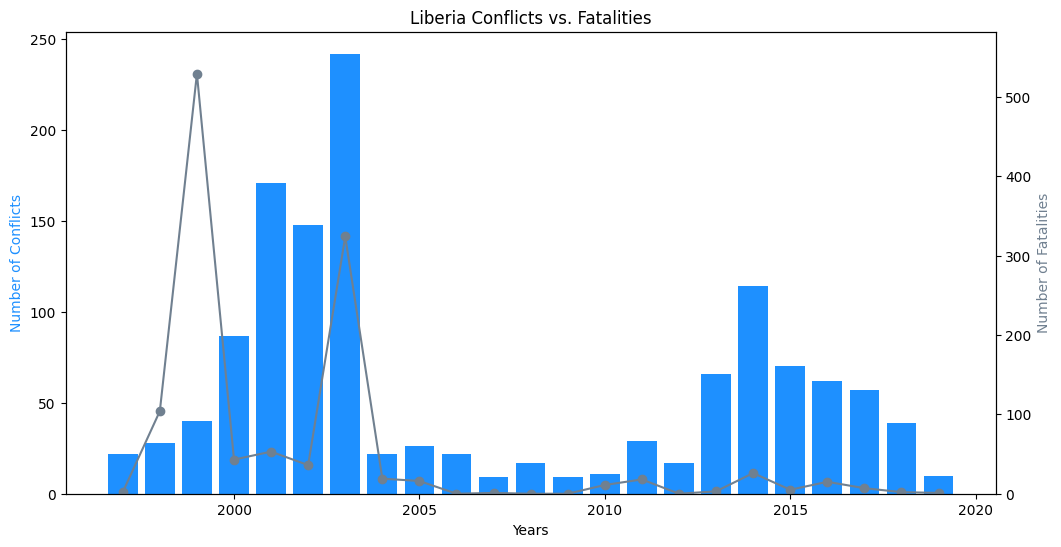

In [5]:
# Calculate the number of conflicts per year
conflicts_per_year = df['year'].value_counts().sort_index()

# Calculate the total fatalities per year
fatalities_per_year = df.groupby('year')['fatalities'].sum().sort_index()
fatalities_per_year = fatalities_per_year.astype(float)

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize = (12,6))

# Plot the number of conflicts
ax1.bar(conflicts_per_year.index, conflicts_per_year.values, color='dodgerblue')
ax1.set_xlabel('Years')
ax1.set_ylabel('Number of Conflicts', color='dodgerblue')

# Create a second y-axis for fatalities
ax2 = ax1.twinx()
ax2.plot(fatalities_per_year.index, fatalities_per_year.values, color='slategray', marker='o')
ax2.set_ylabel('Number of Fatalities', color='slategray')

# Adjust the scale of the y-axis for fatalities plot
ax2.set_ylim(0, fatalities_per_year.max() * 1.1)  # Use .max() to get the maximum value

# Set the title
plt.title('Liberia Conflicts vs. Fatalities')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()



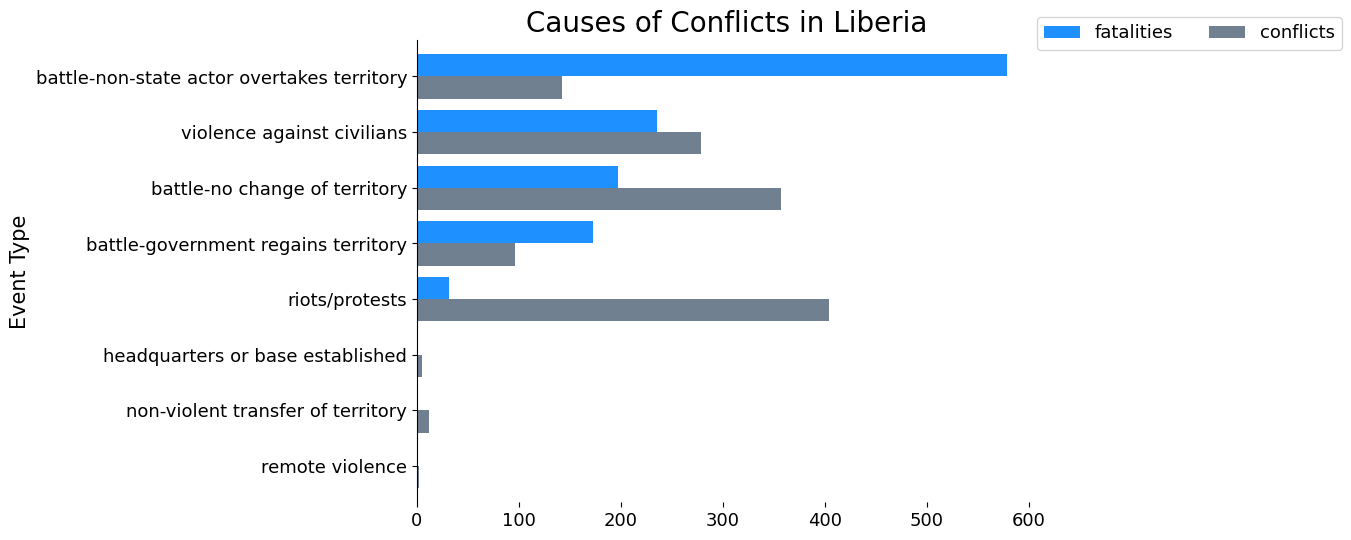

In [6]:
# Lower all word in event_type
df.event_type = df.event_type.apply(lambda x: x.lower())
event_data = df.groupby('event_type').sum().reset_index()
# Create a new columns that count the numbers of counflicts
d = dict(df.event_type.value_counts())
event_data['conflicts'] = event_data['event_type'].map(d)
# Sort the data by Fatalities
event_data.sort_values(by='fatalities', ascending=False,inplace=True)
#reduce the data to only 8 event type
event_data = event_data.head(8)

f, ax = plt.subplots(1,1,figsize = (8,6))
ax = event_data[['fatalities', 'conflicts']].plot(kind='barh',ax=ax,width=0.8,
              color=['dodgerblue', 'slategray'], fontsize=13);

ax.set_title("Causes of Conflicts in Liberia",fontsize=20)
ax.set_ylabel("Event Type", fontsize=15)

ax.set_yticklabels(event_data.event_type.values)

# invert for largest on top
ax.invert_yaxis()
sns.despine(bottom=True)
x_axis = ax.axes.get_xaxis().set_visible(True) # turn off the y axis label
plt.legend(loc=(1.0,0.98),fontsize=13,ncol=2)
plt.show()

Conflicts involving battles where nonstate actors attempt to overtake territories result in the highest number of fatalities. Such conflicts may involve intense fighting and pose significant risks to human lives.

Protests turning into riots are a major cause of conflicts in the region. Understanding the underlying reasons behind these protests and addressing them could potentially help mitigate conflicts.

Max Year:  2019
Min Year:  1997


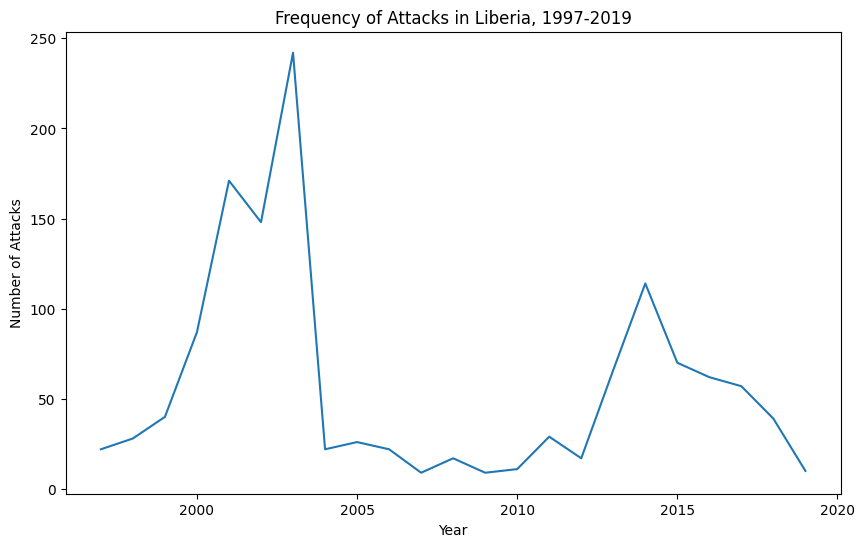

In [7]:
#print minimum and maximum years
print('Max Year: ', df.year.max())
print('Min Year: ', df.year.min())


# group the data by year and count the number of events in each year
attacks_by_year = df.groupby('year').size()
# create a line plot of the frequency of attacks over time
plt.figure(figsize=(10, 6))
plt.plot(attacks_by_year.index, attacks_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title('Frequency of Attacks in Liberia, 1997-2019')
plt.show()

There was a significant increase in the number of attacks in 2003, suggesting that it was a year marked by heightened conflict activity.

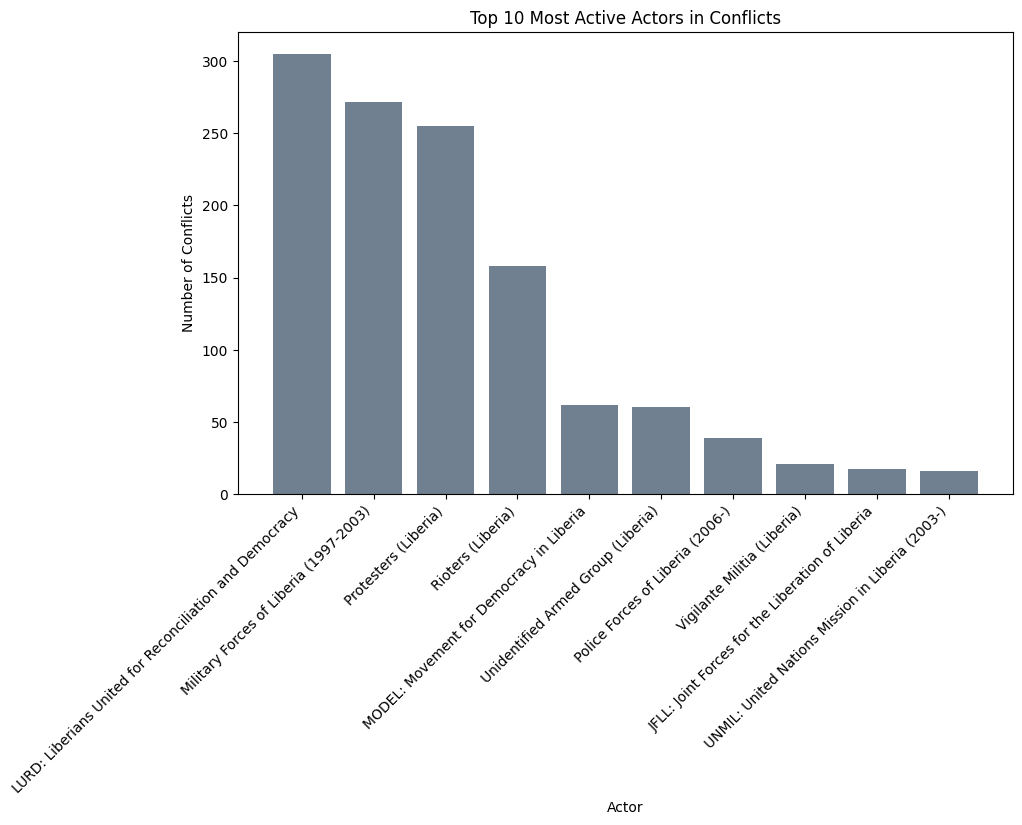

In [8]:
actor_df = df['actor1'].value_counts().reset_index()
actor_df.columns = ['actor1', 'frequency']
# Get the top 10 most active actors
top_actors = df['actor1'].value_counts().head(10)

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top_actors.index, top_actors.values, color='slategray')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Actor')
plt.ylabel('Number of Conflicts')
plt.title('Top 10 Most Active Actors in Conflicts')
plt.show()

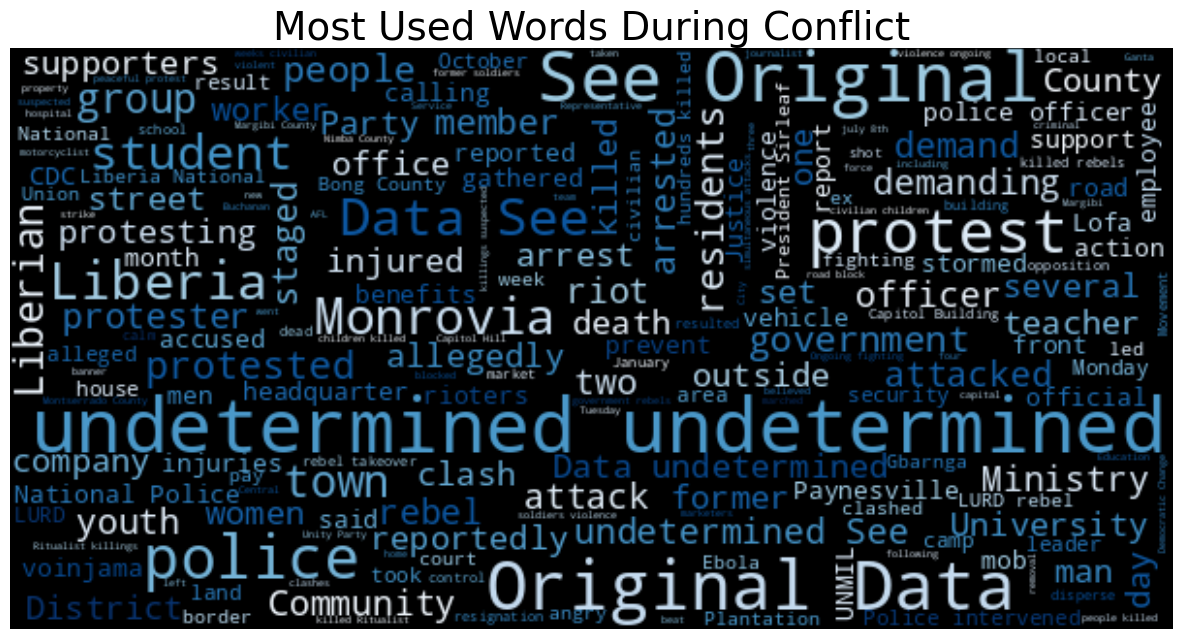

In [9]:
wc = WordCloud(max_font_size=50, width=600, height=300,colormap='Blues')
wc.generate(' '.join(df['notes'].values))

plt.figure(figsize=(15,8))
plt.imshow(wc,interpolation="bilinear")
plt.title("Most Used Words During Conflict", fontsize=28)
plt.axis("off")
plt.show()

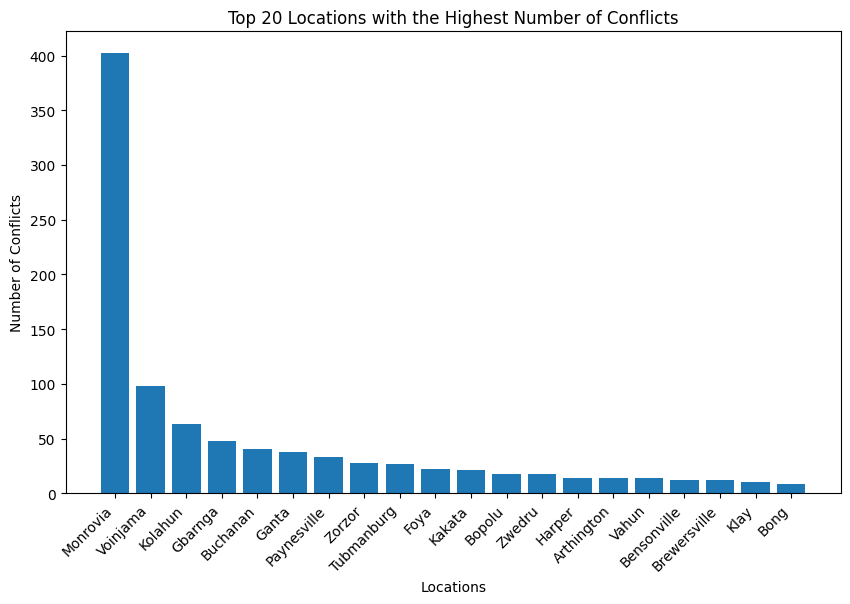

In [10]:
# Get the count of conflicts per location
location_counts = df['location'].value_counts()

# Plot the top 10 countries with the highest number of conflicts
top_20_countries = location_counts.head(20)
plt.figure(figsize=(10,6))
plt.bar(top_20_countries.index, top_20_countries.values)
plt.title('Top 20 Locations with the Highest Number of Conflicts')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Locations')
plt.ylabel('Number of Conflicts')
plt.show()

This indicates that Monrovia experiences a disproportionately higher number of conflicts compared to other regions.

## Machine Learning

### Hot Encode the categorical columns and Split the data for training and testing

In [11]:
# Iterate over each column in the DataFrame
for column in df.select_dtypes(include='object').columns:
    if column != 'notes':
        # Convert the column to categorical codes
        df[column] = df[column].astype('category').cat.codes
# Define features and target
X = df.drop(columns=['notes', 'event_date', 'event_type', 'data_id',	'event_id_no_cnty'])
y = df['event_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for each model
pipelines = [
    ('gbc', Pipeline([('scaler', StandardScaler()), ('model', GradientBoostingClassifier())])),
    ('rf', Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier())])),
    ('svm', Pipeline([('scaler', StandardScaler()), ('model', SVC())]))
]

### Model Pipeline

gbc: Cross-validated F1 Score - 0.868252412682066, Test Accuracy - 0.8598484848484849
rf: Cross-validated F1 Score - 0.8884771781282318, Test Accuracy - 0.8787878787878788
svm: Cross-validated F1 Score - 0.763569751243683, Test Accuracy - 0.7803030303030303


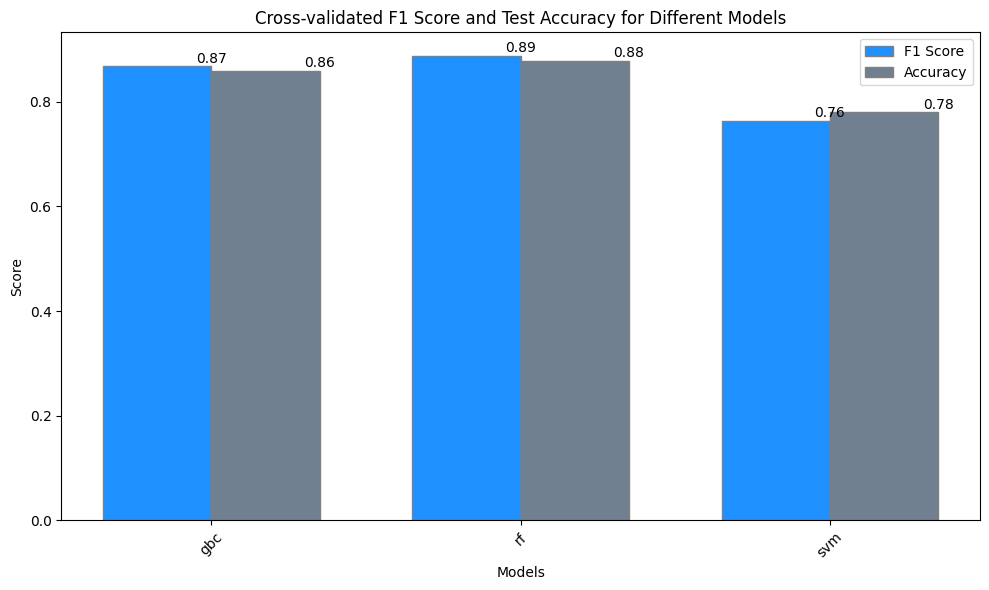

In [12]:
# Define features and target
X = df.drop(columns=['notes', 'event_date', 'event_type', 'data_id', 'event_id_no_cnty'])
y = df['event_type']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create pipelines for each model
pipelines = [
    ('gbc', Pipeline([('scaler', StandardScaler()), ('model', GradientBoostingClassifier())])),
    ('rf', Pipeline([('scaler', StandardScaler()), ('model', RandomForestClassifier())])),
    ('svm', Pipeline([('scaler', StandardScaler()), ('model', SVC())]))
]

# Lists to store f1 scores and accuracies
f1_scores = []
accuracies = []

# Train and evaluate models with cross-validation
for name, pipeline in pipelines:
    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=5, scoring='f1_weighted')
    avg_f1_score = cv_scores.mean()

    # Fit the pipeline to the training data
    pipeline.fit(X_train, y_train)

    # Evaluate the model on the test set
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Append the metrics to the lists
    f1_scores.append(avg_f1_score)
    accuracies.append(accuracy)

    # Print the results
    print(f"{name}: Cross-validated F1 Score - {avg_f1_score}, Test Accuracy - {accuracy}")

# Set color themes
f1_color = 'dodgerblue'
accuracy_color = 'slategray'

# Plot the F1 scores and accuracies
plt.figure(figsize=(10, 6))
bar_width = 0.35
bar_positions_f1 = [i for i, _ in enumerate(pipelines)]
bar_positions_accuracy = [i + bar_width for i, _ in enumerate(pipelines)]

# Plot F1 scores
plt.bar(bar_positions_f1, f1_scores, color=f1_color, width=bar_width, edgecolor='grey', label='F1 Score')

# Plot accuracies
plt.bar(bar_positions_accuracy, accuracies, color=accuracy_color, width=bar_width, edgecolor='grey', label='Accuracy')

# Annotate data inside the bars
for i, f1 in enumerate(f1_scores):
    plt.text(bar_positions_f1[i] + bar_width/2, f1 + 0.001, round(f1, 2), ha='center', va='bottom', color='black')

for i, accuracy in enumerate(accuracies):
    plt.text(bar_positions_accuracy[i] + bar_width/2, accuracy + 0.001, round(accuracy, 2), ha='center', va='bottom', color='black')

plt.xlabel('Models')
plt.ylabel('Score')
plt.title('Cross-validated F1 Score and Test Accuracy for Different Models')
plt.legend()
plt.xticks([i + bar_width/2 for i, _ in enumerate(pipelines)], [name for name, _ in pipelines], rotation=45)
plt.tight_layout()
plt.show()


#### Feature Importance

In [13]:
# Lists to store feature importance for each model
feature_importance_rf = {}
feature_importance_gb = {}

# Train and evaluate models
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    if name == 'rf':
        # Get feature importances for Random Forest
        rf_model = pipeline.named_steps['model']
        feature_importance_rf = dict(zip(X_train.columns, rf_model.feature_importances_))
    elif name == 'gbc':
        # Get feature importances for Gradient Boosting
        gb_model = pipeline.named_steps['model']
        feature_importance_gb = dict(zip(X_train.columns, gb_model.feature_importances_))

# Print top 10 important features for Random Forest
print("Top 10 Important Features for Random Forest:")
print(sorted(feature_importance_rf.items()))

print('-----------------------------------------------------------------------------------------------------------------------------------------------------')
# Print top 10 important features for Gradient Boosting
print("Top 10 Important Features for Gradient Boosting:")
print(sorted(feature_importance_gb.items()))


Top 10 Important Features for Random Forest:
[('actor1', 0.08886468308620629), ('actor2', 0.18303439050273937), ('admin1', 0.016317377765445562), ('admin2', 0.02672068644652512), ('admin3', 0.02164471078021758), ('day', 0.047702130753975704), ('fatalities', 0.011868920161265891), ('geo_precision', 0.003368262452519359), ('inter1', 0.11123842482887984), ('inter2', 0.1477698090587024), ('interaction', 0.0744227000939736), ('latitude', 0.03997714373055025), ('location', 0.023613229983488263), ('longitude', 0.026958010280337865), ('month', 0.04889655693164569), ('source', 0.0365653285462461), ('source_scale', 0.018905518738924), ('time_precision', 0.005004823622758591), ('year', 0.06712729223559835)]
-----------------------------------------------------------------------------------------------------------------------------------------------------
Top 10 Important Features for Gradient Boosting:
[('actor1', 0.024289759657990934), ('actor2', 0.3163676117019675), ('admin1', 0.007397389333077

## Insights and Conclusion

Model Performance and Interpretability:

   -  Among the models evaluated (Random Forest, Gradient Boosting, and SVM), Random Forest and Gradient Boosting consistently demonstrated superior performance, as indicated by higher cross-validated F1 scores and test accuracies compared to SVM.
  - Both Random Forest and Gradient Boosting models exhibited robust performance across multiple metrics, making them suitable choices for predicting conflict types based on the dataset's features.
  - Feature importance analysis revealed significant predictors of conflict types, including actor involvement, administrative divisions, and interaction factors. Gradient Boosting and Random Forest models provided insights into feature

Predictive Modeling for Conflict Prevention:
  - By leveraging machine learning algorithms such as the government of Liberia can proactively predict conflict types and anticipate potential hotspots. These predictive insights empower policymakers, peacekeepers, and humanitarian organizations to allocate resources efficiently, deploy early warning systems, and implement preventive measures to mitigate conflict risks.